In [1]:
%config Completer.use_jedi = False

In [2]:
from utils import *

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import importlib

In [4]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = [12,8]

In [5]:
from ising_model import Simulate_MH

In [6]:
from multiprocessing import Pool

In [7]:
from parallel import to_run

In [8]:
SEED = np.random.randint(0,100000000)
# SEED = 14702218
Ms, Es, engine = to_run(1, 5_000_000, 24, 32, 100, SEED, True)

1


In [9]:
Es

array([22, 22, 22, ..., 22, 22, 22])

In [10]:
Ms

array([-2, -2, -2, ..., -2, -2, -2])

1


ValueError: `bins` must be positive, when an integer

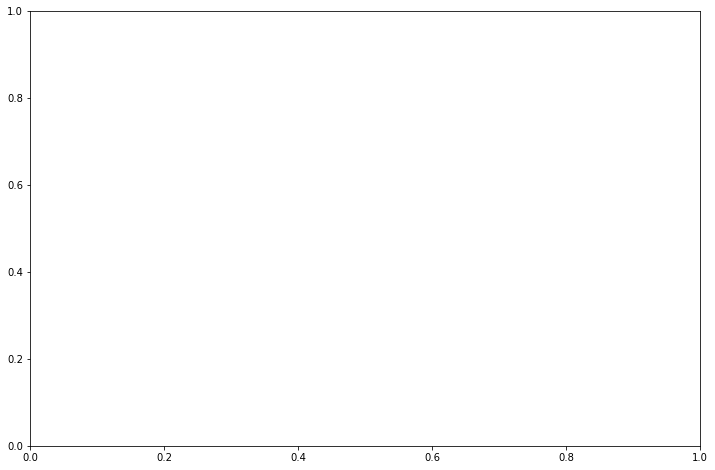

In [10]:
Mss = Ms//2
plt.hist(Mss, bins=(Mss.max()-Mss.min()), range=(Mss.min(), Mss.max()), 
         log=False);

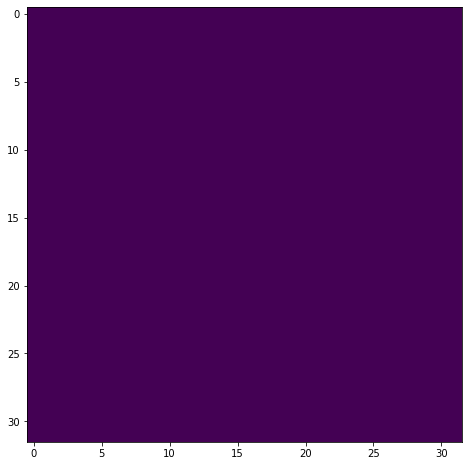

In [11]:
plt.imshow(engine.get_state()+1)

In [ ]:
len(Ms)

fraction: 0.00


<ErrorbarContainer object of 3 artists>

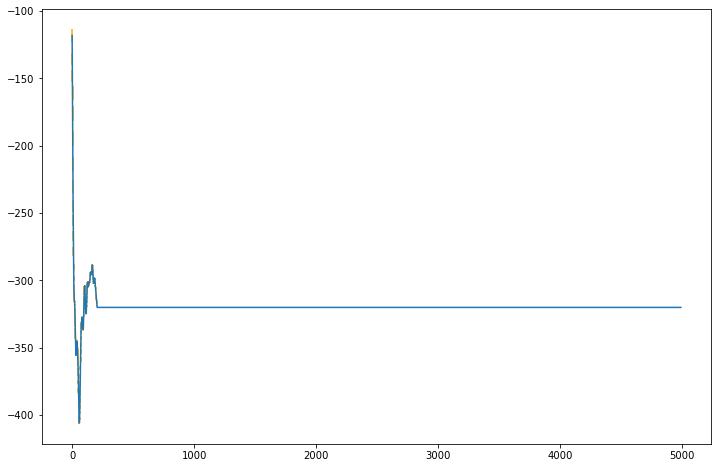

In [48]:
sp = 1
window = 10**2
print(f"fraction: {window/len(Ms):0.2f}", )
mean, err = moving_mean_err(Ms, window, stride=10)
plt.errorbar(np.arange(len(mean))[::sp], mean[::sp], yerr=err[::sp], ecolor="orange", )

In [12]:
from tqdm.contrib.concurrent import process_map  # or thread_map


In [14]:
pool = Pool(7)

In [15]:
runs = 100
Ts = np.linspace(0,6,runs+1)[1:]
result = pool.starmap(to_run, 
        np.stack((np.arange(runs),
                  [10_000_000]*runs, # steps
                  Ts, # temperature
                  [32]*runs, # lattice size
                  [10]*runs, # frequency
                  np.random.randint(0,1000000, runs)), axis=1)
    )

In [16]:
meanMs = []
errMs = []
for i,(Ms, Es) in enumerate(result):
    mean, err = mean_with_err(Ms[-Ms.shape[0]//3:])
    meanMs.append(mean)
    errMs.append(err)
    

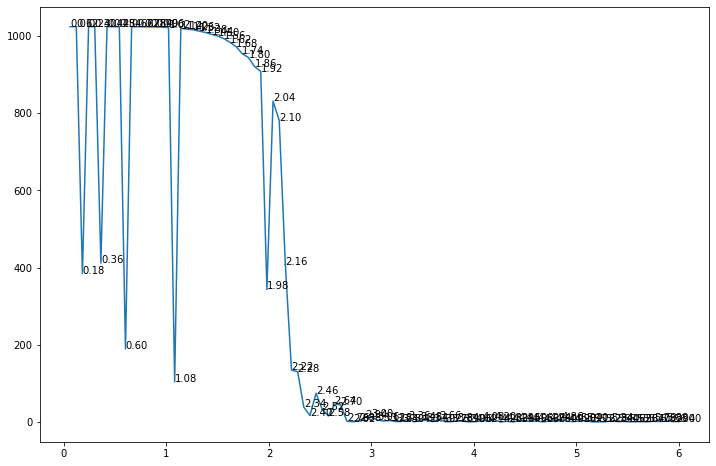

In [17]:
plt.errorbar(Ts, np.abs(meanMs),yerr=errMs)
for t, m in zip(Ts, np.abs(meanMs)):
    plt.gca().annotate(f'{t:0.2f}', (t,m)) 


-0.07819201997780247
-0.066543820199778
0.04003041065482796
-0.01550086792452831


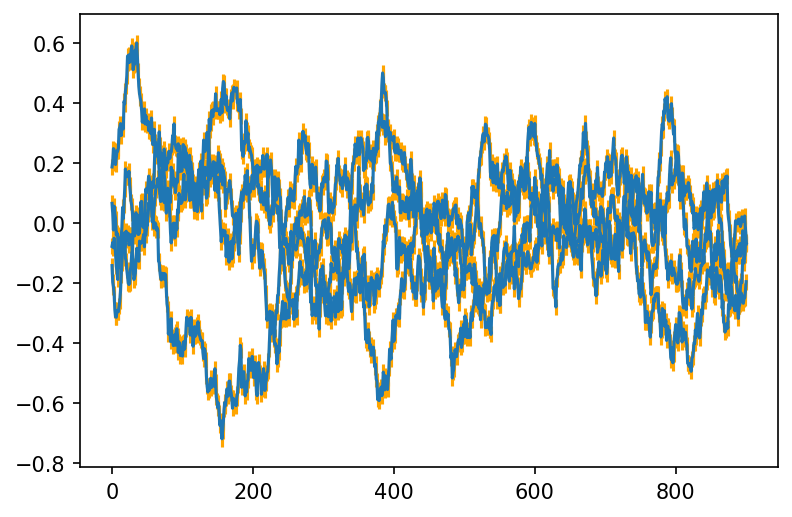

In [13]:
sp = 1

for i,(Ms, Es) in enumerate(result):
#     print(i, end="")
    mean, err = moving_mean_err(Ms, 10**6, stride=10000)
    print(mean.mean())
    plt.errorbar(np.arange(len(mean))[::sp], mean[::sp], yerr=err[::sp], ecolor="orange", label=f"{i}")
# plt.legend()

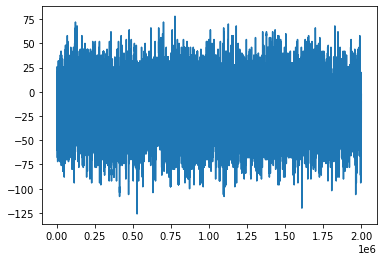

In [10]:
plt.plot(engine.get_sampled_E())

In [6]:
engine.FLIPS

0

In [ ]:
np.